## Import packages

In [1]:
%matplotlib widget
import sys
sys.path.append('src/')

import numpy as np
import matplotlib.pyplot as plt
import coordinates as coord 
from matplotlib import cm # for colormaps
import attitude as att # this is new!
from scipy.integrate import odeint

## Useful constants

In [2]:
pi      = np.pi
deg2rad = pi / 180.0
rad2deg = 180.0 / pi

min2rad = deg2rad / 60.0
rad2min = rad2deg * 60.0

sec2rad = min2rad / 60.0
rad2sec = rad2min * 60.0

## Choose principal moments of inertia

In [3]:
A = 1
B = np.sqrt(2)
C = 2

## select the value of angular momentum

In [4]:
L = 1

## Remember that the equation for angular momentum conservation in terms of momenta on pricipal axes defines a sphere. So, let's plot that sphere.

Text(0.5, 0, '$L_x$')

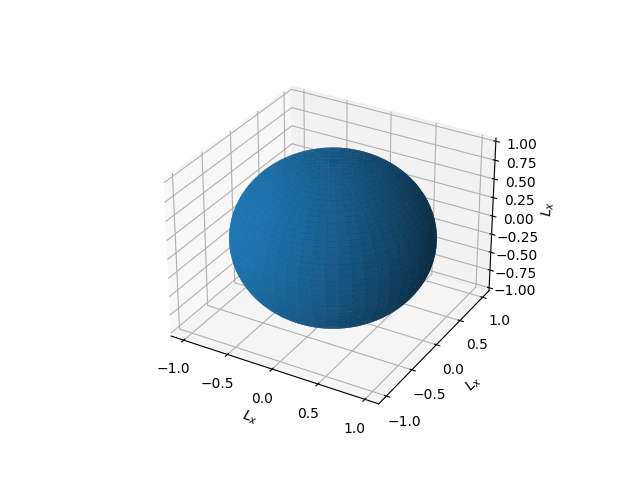

In [5]:
lat        = np.linspace(-np.pi/2,np.pi/2,400)
lon        = np.linspace(0,2*np.pi,400)
lon, lat   = np.meshgrid(lon,lat)
Lx, Ly, Lz = coord.sph2cart(lon,lat,L)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(Lx,Ly,Lz)
ax.set_xlabel(r'$L_x$')
ax.set_ylabel(r'$L_x$')
ax.set_zlabel(r'$L_x$')

## Now, let's compute the kinetic energy as a function of angular momentum components

In [26]:
E          = Lx ** 2 / (2 * A) + Ly ** 2 / (2 * B) + Lz ** 2 / (2 * C)
# choose min and max values
E_min      = np.min(E)
E_max      = np.max(E)
n_energies = 5
E_grid     = np.linspace(E_min * 1.01, E_max * 0.99, n_energies)

#### Let's now find contour curves at which energy is constant. So, we can them "constant energy curves". Remember that energy is a conserved quantity, so constant energy curves define the intersection of the angular momentum sphere (at which angular momentum magnitude is constant) and energy ellipsoids (at which energy is constant).

Text(0, 0.5, ' (fake) Latitude [deg]')

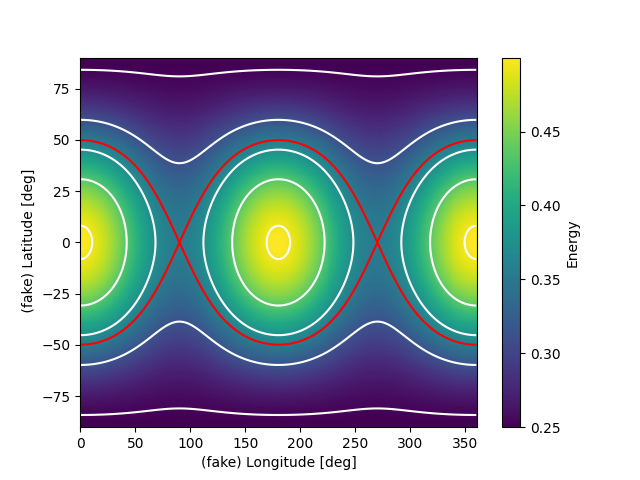

In [27]:
plt.figure()
plt.pcolor(lon * rad2deg,lat  * rad2deg, E)
cbar = plt.colorbar()
cbar.ax.set_ylabel('Energy')
cs            = plt.contour(lon * rad2deg,lat  * rad2deg, E, E_grid,colors='w')
cs_separatrix = plt.contour(lon * rad2deg, lat * rad2deg, E, [1 / (2 * B)],colors='r')
plt.xlabel("(fake) Longitude [deg]")
plt.ylabel("(fake) Latitude [deg]")

## What is the lowest energy state?

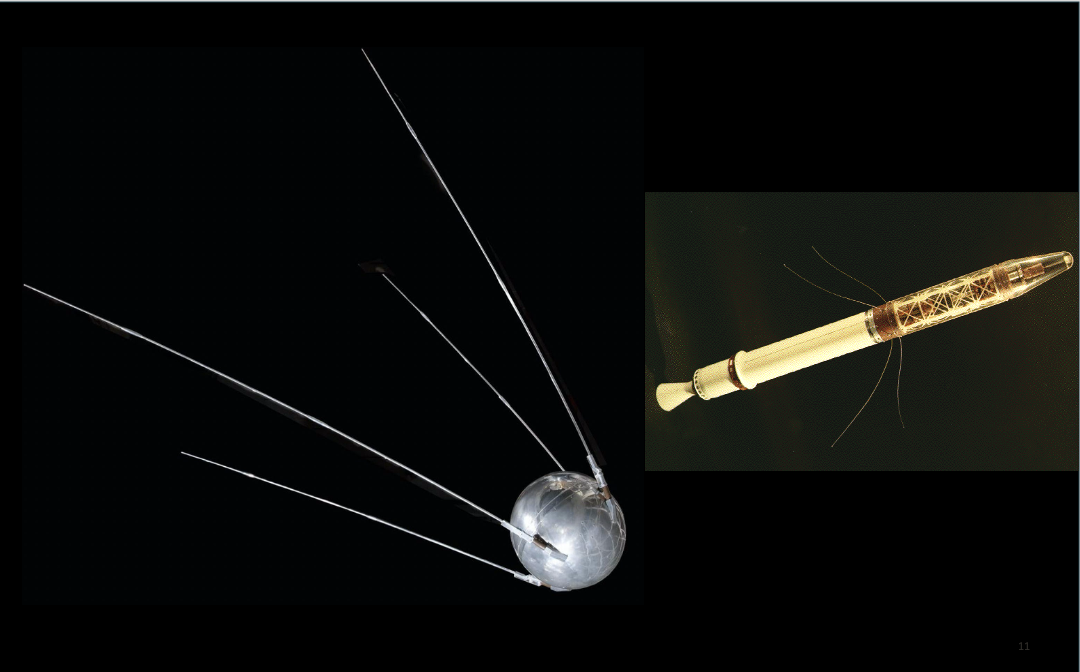

/var/folders/lp/nzbfjgh14nv_gzpg4ygpc3_m0000gn/T/ipykernel_24607/2805948657.py:6: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  p = cs.collections[i].get_paths()[0]
/var/folders/lp/nzbfjgh14nv_gzpg4ygpc3_m0000gn/T/ipykernel_24607/2805948657.py:13: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  p = cs_separatrix.collections[0].get_paths()[0]


Text(0.5, 0, '$L_z$')

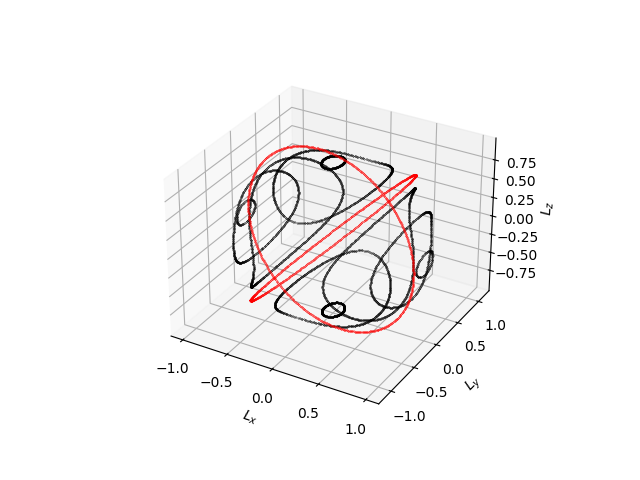

In [28]:
# Plot the surface of constant angular momentum
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# surf    = ax.plot_surface(Lx, Ly, Lz, rcount = 100, ccount = 100, facecolors = cm.jet((E - E_min)/(E_max - E_min)),alpha=1)

for i in range(n_energies):
    p = cs.collections[i].get_paths()[0]
    v = p.vertices
    lon_c = v[:,0] * deg2rad
    lat_c = v[:,1] * deg2rad
    Lx_c, Ly_c, Lz_c = coord.sph2cart(lon_c,lat_c,L)
    plt.plot(Lx_c,Ly_c,Lz_c,'.k',markersize=0.5)

p = cs_separatrix.collections[0].get_paths()[0]
v = p.vertices
lon_c = v[:,0] * deg2rad
lat_c = v[:,1] * deg2rad
Lx_c, Ly_c, Lz_c = coord.sph2cart(lon_c,lat_c,L)
plt.plot(1.1*Lx_c, 1.1*Ly_c, 1.1*Lz_c, '.r',markersize=0.5)

ax.set_xlabel(r'$L_x$')
ax.set_ylabel(r'$L_y$')
ax.set_zlabel(r'$L_z$')

## Now, let's practice how we can diagonalize moment of inertia tensor

The Dawn spacecraft observed asteroid Vesta and its shape was reconstructed. I computed the moment of inertia tensor for Vesta given its observed shape and assuming its homogeneous in density.  

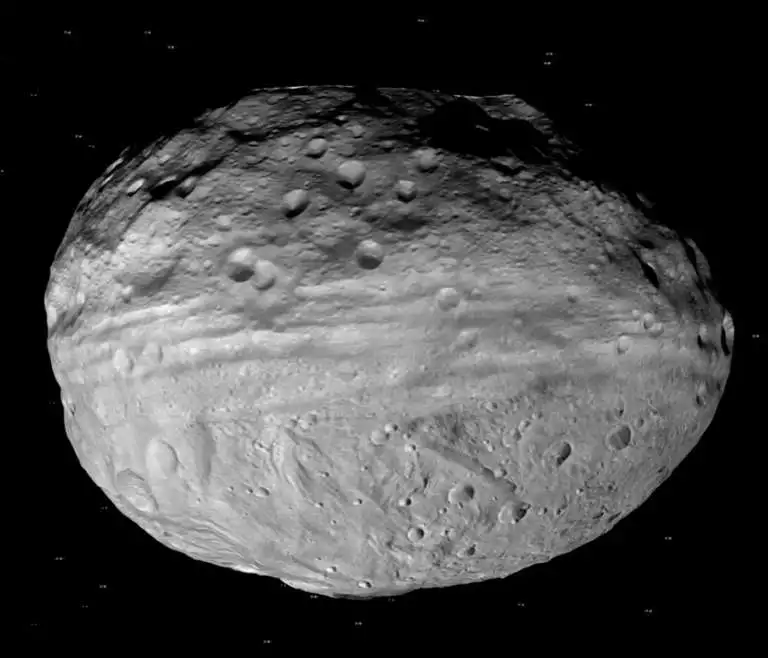!

In [29]:
# inertia tensor in coordinate system with Z-axis along the axis of rotation of Vesta, X- and Y-axis are in the equatorial plane
I = 1e30 * np.array([[6.6620,   -0.0113, -0.0345],\
                    [-0.0113,   6.8658, -0.0072],\
                    [-0.0345,  -0.0072,  8.1949]])


M_vesta  = 2.59027e20 # mass of asteroid Vesta in kg
R_mean   = 262.7e3    # mean radius of asteroid Vesta

Now, let's find the eigenvectors and eigenvalues

In [30]:
eigenvalues, eigenvectors = att.principal_inertia(I)

In [31]:
print(eigenvalues)

[8.19571234e+30 6.66058396e+30 6.86640370e+30]


So, we get something on the order of 1e30 kg m$^2$ Let's make it more scientist-friendly and express eigenvalues as normalized moments of inertia by dividing by $M R^2$

In [32]:
print(eigenvalues / (M_vesta * R_mean ** 2))

[0.45848119 0.37260367 0.38411755]


In [33]:
print(eigenvectors)

[[ 0.02244999 -0.99818594  0.05586444]
 [ 0.0052217  -0.05576069 -0.99843051]
 [-0.99973433 -0.02270646 -0.0039604 ]]


This is the output from numpy.linalg.eig function. It outputs the normalized (unit “length”) eigenvectors, such that the column eigenvectors[:,i] is the eigenvector corresponding to the eigenvalue eigenvalues[i].

### Ok, these vectors are close to unity but not perfectly? Why? Does this mean that Vesta is not perfectly in the state of principal rotation around the axis of largest inertia?